In [ ]:
!pip install tensorflow

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

     -------------------------------------- 376.9/376.9 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 5.5/5.5 MB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 9.0 MB/s eta 0:00:00
     --------------------

In [13]:
data=pd.read_csv('city_temperature.csv')
data.head()

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\4138080781.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('city_temperature.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [10]:
#Exploring Data Analysis 
data.nunique()

Region               7
Country            125
State               52
City               321
Month               12
Day                 32
Year                28
AvgTemperature    1517
dtype: int64

In [11]:
data.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [14]:
#Cleaning Data 
#The following procedures are performed to clean the data

#The rows with values '201' and '200' are removed from the Years column.
#The rows with day as '0' is removed.
#The States column with data only for the US is removed.
#The rows with temperature -99 degress Fahrenheit is removed
# Removing '201' and '200' from Year column
df = data[~data['Year'].isin(['201','200'])]

# Removing '0' from Date column
df = df[df['Day'] != 0]

# Removing 'State' column
df = df.drop(columns=['State'])

# Dropping the rowns with temperature -99
df = df.drop(df[df['AvgTemperature'] == -99.0].index)


In [15]:
#Adding Columns 
#Average Temperature in Celcius is added.
#Combining year, month and day to make the Date column in the format YYYY-MM-DD
#Introduce column Period in the format YYYY-MM
# Adding a row with average temperatures in Celcius
df['AvgTempCelcius'] = round((((df.iloc[:,6] - 32) * 5) / 9),2)

# Adding the Date column in the format YYYY-MM-DD
df['Date'] = df.iloc[:,5].astype(str) + '-' + df.iloc[:,3].astype(str) + '-' + df.iloc[:,4].astype(str)

# Coverting the Date column into Pandas Date type datetime64[ns]
df['Date'] = pd.to_datetime(df['Date'])

# Introducing the Period column in format YYYY-MM
df['Month/Year'] = pd.to_datetime(df['Date']).dt.to_period('M')


Region
Africa                               74.402602
Asia                                 68.109723
Australia/South Pacific              62.303693
Europe                               51.947171
Middle East                          73.840683
North America                        56.150198
South/Central America & Carribean    72.202024
Name: AvgTemperature, dtype: float64


Text(0.5, 1.0, 'Mean Average Temperatures by Region')

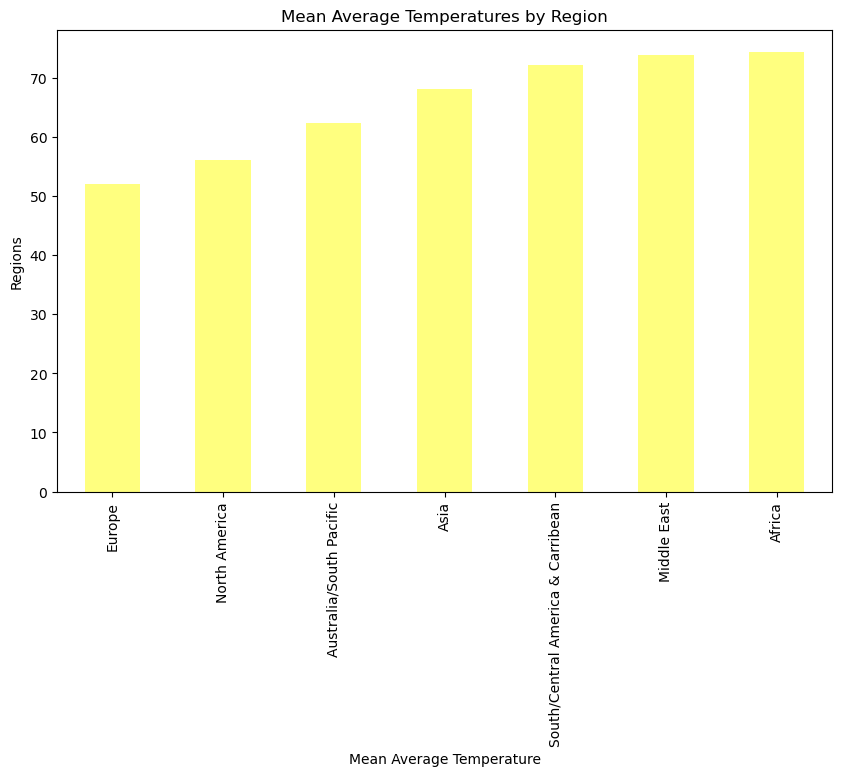

In [16]:
#Visualization and EDA
print(df.groupby(['Region'])['AvgTemperature'].mean())
avg_temp_world = pd.Series(round(df.groupby('Region')['AvgTemperature'].mean().sort_values(),2))
avg_temp_world.plot(kind='bar', figsize = (10,6), color='yellow', alpha=0.5)
plt.xlabel('Mean Average Temperature')
plt.ylabel('Regions')
plt.title('Mean Average Temperatures by Region')

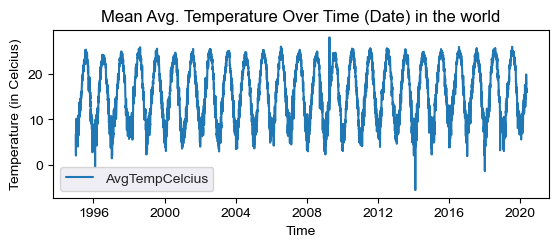

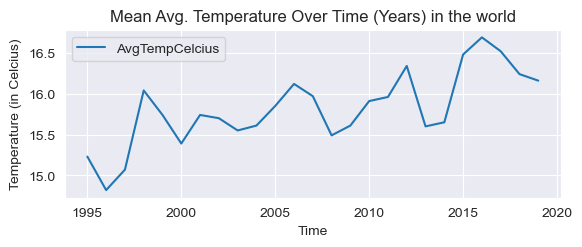

In [17]:
world_temp_date = pd.DataFrame(pd.Series(round(df.groupby('Date')['AvgTempCelcius'].mean(),2))[:-1])
world_temp_year = pd.DataFrame(pd.Series(round(df.groupby('Year')['AvgTempCelcius'].mean(),2))[:-1])

plt.subplot(2,1,1)
sns.set_style("darkgrid")
sns.lineplot(data = world_temp_date, color = 'blue')
plt.xlabel('Time')
plt.ylabel('Temperature (in Celcius)')
plt.title('Mean Avg. Temperature Over Time (Date) in the world')
plt.show()
plt.subplot(2,1,2)
sns.set_style("darkgrid")
sns.lineplot(data = world_temp_year, color = 'blue')
plt.xlabel('Time')
plt.ylabel('Temperature (in Celcius)')
plt.title('Mean Avg. Temperature Over Time (Years) in the world')
plt.show()

In [25]:
## Function to calculate the temperature fluctuation
def calculate_fluctuation(series):
    fluctuation = np.zeros((len(series),))
    for i in range(1,len(series)):
        fluctuation[i] = series[i] - series[0]
    return fluctuation

## Function to plot the temperature fluctuation Lineplot
def plot_change(years, fluctuation, entity):
    change_df = pd.DataFrame(np.column_stack((years, fluctuation)), columns = ['Year', 'Change'])
    change_df['Year'] = change_df['Year'].astype(int)
    sns.lineplot(x = "Year", y = "Change", data = change_df, err_style="bars", ci=68, label = entity)
    x = np.zeros((len(change_df['Year']),1))
    plt.plot(change_df['Year'], x, '--')
    plt.title('Temperature fluctuations over the years')
    plt.ylabel('Change in Temperature')
## Function to plot the temperature fluctuation in the world 
def world_change_temp():
    dat = np.array(pd.Series(round(df.groupby('Year')['AvgTempCelcius'].mean(),2)))[:-1]
    years = np.arange(1995,2020)
    fluctuation = calculate_fluctuation(dat)
    plot_change(years, fluctuation, 'World')

## Function to plot the temperature fluctuation in every country
def country_change_temp(country):
    dat = np.array(pd.Series(round(df[df['Country'] == country].groupby('Year')['AvgTempCelcius'].mean(),2)))[:-1]
    years = np.arange(1995,2020)
    fluctuation = calculate_fluctuation(dat)
    plot_change(years, fluctuation, country)
## Function to plot the temperature fluctuation in every continent
def region_change_temp(region):
    dat = np.array(pd.Series(round(df[df['Region'] == region].groupby('Year')['AvgTempCelcius'].mean(),2)))[:-1]
    years = np.arange(1995,2020)
    fluctuation = calculate_fluctuation(dat)
    plot_change(years, fluctuation, region)
### Function to plot the average temperature and temperature fluctutaion distribution for every country    
def temperature_histogram(country):
    hist1_s = np.array(pd.Series(round(df.groupby('Year')['AvgTempCelcius'].mean(),2)))[:-1]
    hist2_s = np.array(pd.Series(round(df[df['Country'] == country].groupby('Year')['AvgTempCelcius'].mean(),2)))[:-1]
    hist1_fluctuation = calculate_fluctuation(hist1_s)
    hist2_fluctuation = calculate_fluctuation(hist2_s)
    print('Skewness for Temperature in %s: ' %country, df[df['Country'] == country]['AvgTempCelcius'].skew())
    print('Kurtosis for Temperature in %s: ' %country, df[df['Country'] == country]['AvgTempCelcius'].kurt())
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[df['Country'] == country]['AvgTempCelcius'], label = country)
    sns.distplot(df['AvgTempCelcius'], label = 'World')
    plt.legend()    
    plt.subplot(1,2,2)
    sns.distplot(hist1_fluctuation , label = 'World')
    sns.distplot(hist2_fluctuation, label = country)
    plt.xlabel('Temperature Fluctuations')
    plt.legend()

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x = "Year", y = "Change", data = change_df, err_style="bars", ci=68, label = entity)
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


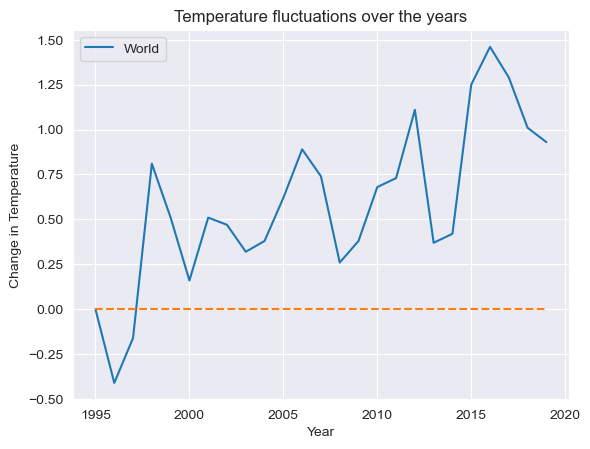

In [26]:
world_change_temp()

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x = "Year", y = "Change", data = change_df, err_style="bars", ci=68, label = entity)
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


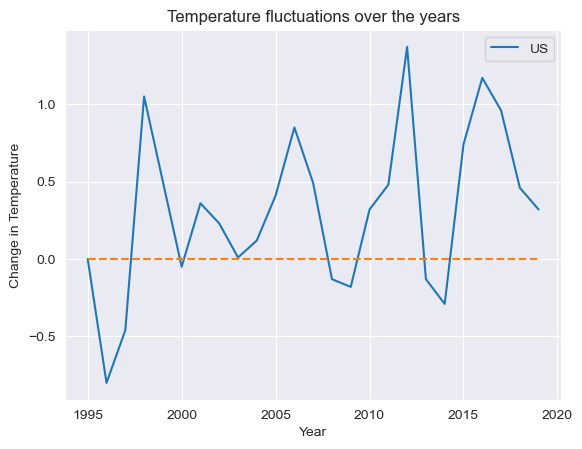

In [27]:
#From the below graphs, we can find that there is a gradual increase in the temprerature from 1995 in the United States and China, but temperature has dropped in Canada. Also, we can find that the temperature dropped during the 2008 economic crisis.
country_change_temp('US')

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x = "Year", y = "Change", data = change_df, err_style="bars", ci=68, label = entity)
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


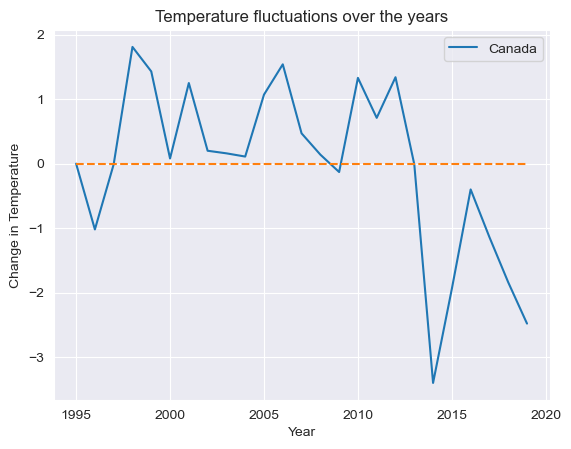

In [28]:
country_change_temp('Canada')

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x = "Year", y = "Change", data = change_df, err_style="bars", ci=68, label = entity)
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


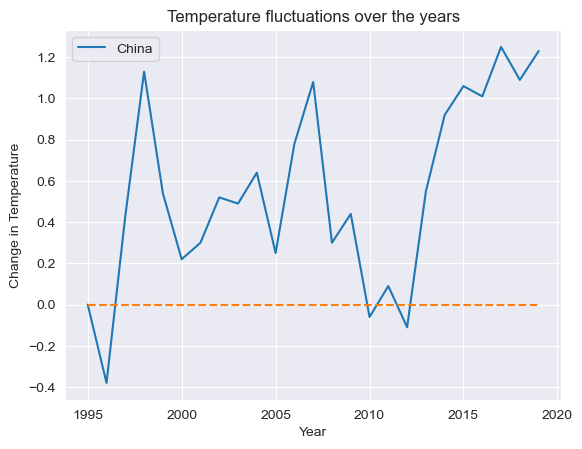

In [29]:
country_change_temp('China')

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x = "Year", y = "Change", data = change_df, err_style="bars", ci=68, label = entity)
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\DrAhm\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


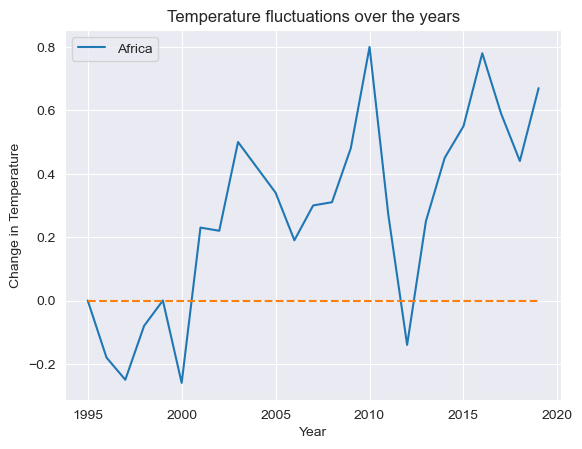

In [30]:
region_change_temp('Africa')

Skewness for Temperature in US:  -0.511876203365743
Kurtosis for Temperature in US:  -0.18946559406569596


C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Country'] == country]['AvgTempCelcius'], label = country)
C:\Users\DrAhm\AppData\Local\Temp\ipykernel_24420\39397557.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg

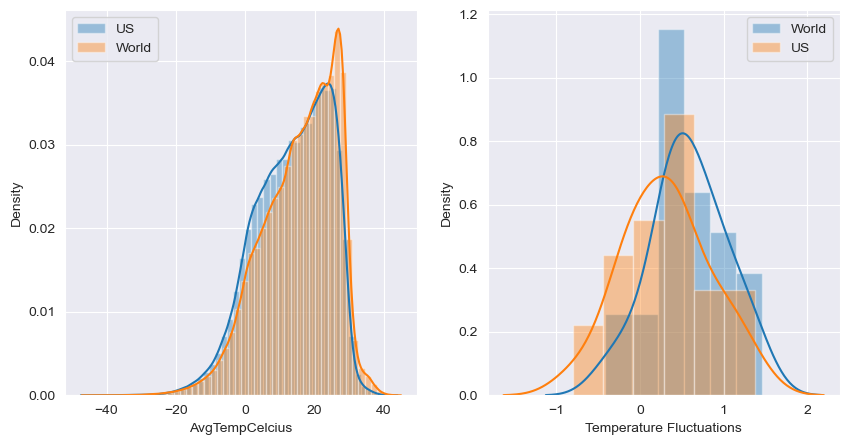

In [32]:
#Temperature and Fluctuations distribution by country
temperature_histogram('US')

In [33]:
#Time Series Forecasting using DNN ,LSTM and CNN
#In order to create a forecasting model, the data has been considered as a time-series data and Neural networks are used to recognise and predict time series
# Create the series
series = np.array(list(pd.Series(round(df.groupby('Date')['AvgTempCelcius'].mean(),2))))

# Creating time intervals
time = np.array(np.arange(0,len(series)))

In [34]:
# We have 7000 training examples and rest as training examples
split_time = 7000

# Defining the Training set and test set
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

# Initialising the Hyperparamenters
window_size = 60
batch_size = 100
shuffle_buffer_size = 1000

In [35]:
## Function to create a line plot
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

## Function to prepare data to be fed into the Tensorflow model
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    dp = tf.data.Dataset.from_tensor_slices(series)
    dp = dp.window(window_size + 1, shift=1, drop_remainder=True)
    dp = dp.flat_map(lambda w: w.batch(window_size + 1))
    dp = dp.shuffle(shuffle_buffer)
    dp = dp.map(lambda w: (w[:-1], w[1:]))
    return dp.batch(batch_size).prefetch(1)

## Function to prepare validation data into the model for prediction
def model_forecast(model, series, window_size):
    dp = tf.data.Dataset.from_tensor_slices(series)
    dp = dp.window(window_size, shift=1, drop_remainder=True)
    dp = dp.flat_map(lambda w: w.batch(window_size))
    dp = dp.batch(32).prefetch(1)
    forecast = model.predict(dp)
    return forecast

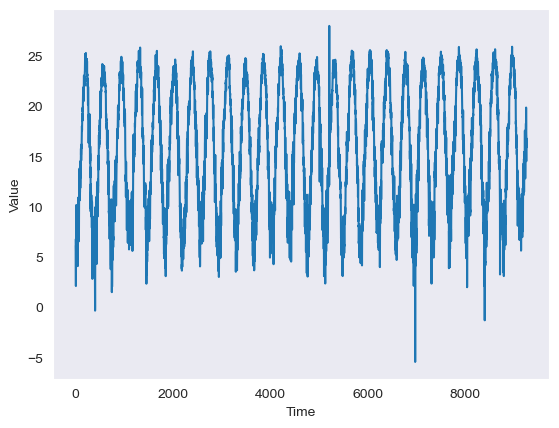

In [36]:
# Plotting the time series
plot_series(time, series)

In [44]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Lambda

# Defining and running the model with callbacks to tune Learning rate for SGD optimizer
# The model contains 1 Conv1D filter, 2 LSTMs, 3 Dense layers, and 1 Lambda layer

# Clear the previous TensorFlow session and set seeds for reproducibility
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Defining window sizes for hyperparameter tuning
window_size = 64
batch_size = 256

# Assuming windowed_dataset is a function you've defined elsewhere to preprocess your data
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

# Defining the model
model = Sequential([
    Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
    Lambda(lambda x: x * 400)
])

# Create a callback function to get optimal learning rate
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

# Defining the optimizer with the correct argument
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

# Compile the model with Huber loss function
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Running the model
history = model.fit(train_set, epochs=30, callbacks=[lr_schedule])


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(7000,)
Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - loss: 126.9124 - learning_rate: 1.0000e-08
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - loss: 27.1862 - learning_rate: 1.1220e-08
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - loss: 17.4301 - learning_rate: 1.2589e-08
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - loss: 14.7288 - learning_rate: 1.4125e-08
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - loss: 13.2171 - learning_rate: 1.5849e-08
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - loss: 12.2291 - learning_rate: 1.7783e-08
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - loss: 11.2719 - learning_rate: 1.9953e-08
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - loss: 10.5223 - learning_rate: 2.2387e-08
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - loss: 9

In [45]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

288/288 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


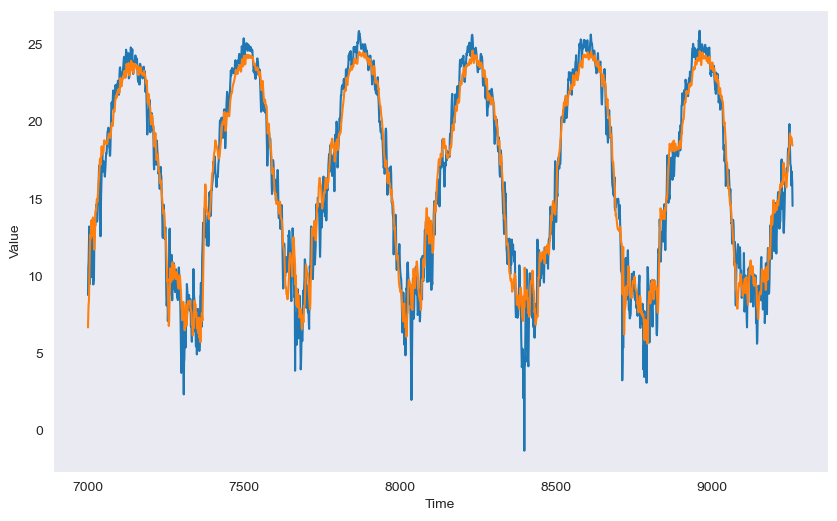

In [46]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [53]:
#Checking the mean absolute error of the validation set¶
#We can find that the MAE for the validation set is pretty low and hence the model is a good forcasting model
# Assuming x_valid and rnn_forecast are your validation data and predictions

# Calculate Mean Absolute Error (MAE)
mae = tf.reduce_mean(tf.abs(x_valid - rnn_forecast)).numpy()
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = tf.reduce_mean(tf.square(x_valid - rnn_forecast)).numpy()
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 1.0629965476736558
Mean Squared Error (MSE): 2.058166972957376


In [ ]:
#Checking the mean absolute error of the validation set¶
#We can find that the MAE for the validation set is pretty low and hence the model is a good forcasting model